<a href="https://colab.research.google.com/github/JingchenYan1/Intro-to-ML/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Neural Network...
Epoch 0, Training Loss: 0.07116224616765976, Validation Loss: 0.09222245216369629
Epoch 100, Training Loss: 0.013455389067530632, Validation Loss: 0.020934870466589928
Epoch 200, Training Loss: 0.008963372558355331, Validation Loss: 0.015778645873069763
Epoch 300, Training Loss: 0.007691845763474703, Validation Loss: 0.013941069133579731
Epoch 400, Training Loss: 0.007318179588764906, Validation Loss: 0.013533436693251133
Epoch 500, Training Loss: 0.007205161266028881, Validation Loss: 0.01349461730569601
Epoch 600, Training Loss: 0.007123757619410753, Validation Loss: 0.013502627611160278
Epoch 700, Training Loss: 0.0070697832852602005, Validation Loss: 0.013463057577610016
Epoch 800, Training Loss: 0.007036508060991764, Validation Loss: 0.013456512242555618
Epoch 900, Training Loss: 0.007006238214671612, Validation Loss: 0.013456854969263077
Epoch 1000, Training Loss: 0.006967630237340927, Validation Loss: 0.013448464684188366
Epoch 1100, Training Loss: 0.0

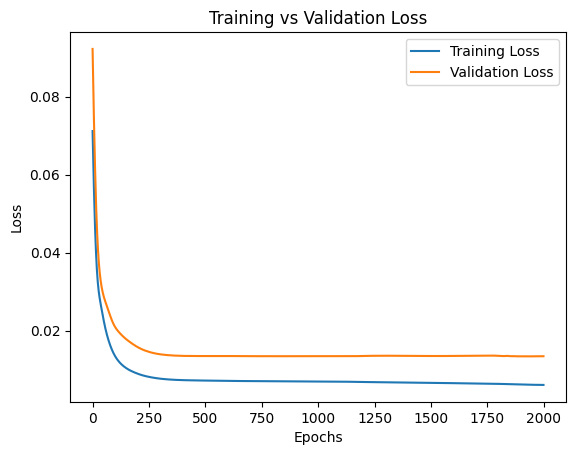

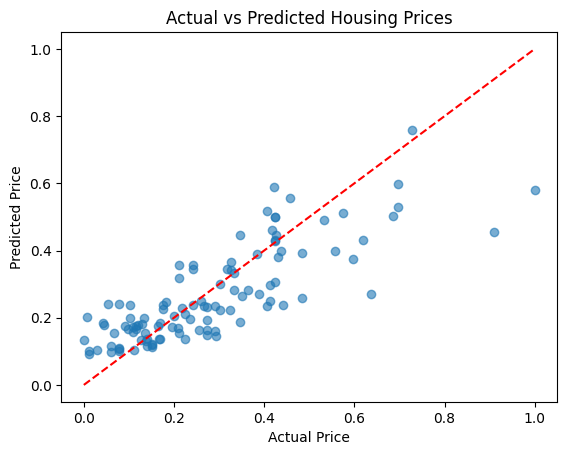

In [5]:
import numpy as np
import pandas as pd
import torch
from torch.optim import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import time

file_path = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))

binary_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[binary_features] = housing[binary_features].apply(lambda x: x.map({'yes': 1, 'no': 0}))

furnishingstatus_map = {'furnished': 1, 'semi-furnished': 0.5, 'unfurnished': 0}
housing['furnishingstatus'] = housing['furnishingstatus'].map(furnishingstatus_map)

X = housing.drop('price', axis=1)
y = housing['price']

numerical_features = [col for col in X.columns if col not in binary_features]

scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

y = scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

class FullyConnectedNN(torch.nn.Module):
    def __init__(self, input_dim):
        super(FullyConnectedNN, self).__init__()
        self.hidden = torch.nn.Linear(input_dim, 8)
        self.output = torch.nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        return self.output(x)

def train_nn_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
    input_dim = X_train.shape[1]
    model = FullyConnectedNN(input_dim)
    criterion = torch.nn.MSELoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    training_loss = []
    validation_loss = []

    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)

        if epoch % 100 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

        training_loss.append(loss.item())
        validation_loss.append(val_loss.item())

    end_time = time.time()
    training_time = end_time - start_time

    return model, training_loss, validation_loss, training_time

learning_rate = 0.001
epochs = 2000

print("Training Neural Network...")
model, train_loss, val_loss, training_time = train_nn_model(X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, learning_rate, epochs)

print(f"Total Training Time: {training_time:.2f} seconds")

with torch.no_grad():
    y_val_pred = model(X_val_tensor)
    mae = torch.mean(torch.abs(y_val_pred - y_val_tensor))
    r2 = 1 - torch.sum((y_val_pred - y_val_tensor) ** 2) / torch.sum((y_val_tensor - torch.mean(y_val_tensor)) ** 2)

print(f"Validation Accuracy - MAE: {mae.item():.4f}, R² Score: {r2.item():.4f}")

plt.plot(range(len(train_loss)), train_loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

plt.scatter(y_val_tensor.numpy(), y_val_pred.numpy(), alpha=0.6)
plt.plot(
    [y_val_tensor.min().numpy(), y_val_tensor.max().numpy()],
    [y_val_tensor.min().numpy(), y_val_tensor.max().numpy()],
    'r--'
)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.show()


Training Neural Network...
Epoch 0, Training Loss: 0.20977318286895752, Validation Loss: 0.24315737187862396
Epoch 100, Training Loss: 0.013535694219172001, Validation Loss: 0.023593895137310028
Epoch 200, Training Loss: 0.008247236721217632, Validation Loss: 0.014300735667347908
Epoch 300, Training Loss: 0.007171608041971922, Validation Loss: 0.012982958927750587
Epoch 400, Training Loss: 0.0066978284157812595, Validation Loss: 0.01273353397846222
Epoch 500, Training Loss: 0.00652209622785449, Validation Loss: 0.012660342268645763
Epoch 600, Training Loss: 0.0063988035544753075, Validation Loss: 0.012654811143875122
Epoch 700, Training Loss: 0.006301082670688629, Validation Loss: 0.012685569934546947
Epoch 800, Training Loss: 0.0062323142774403095, Validation Loss: 0.012655461207032204
Epoch 900, Training Loss: 0.006119982805103064, Validation Loss: 0.01247248612344265
Epoch 999, Training Loss: 0.006018017418682575, Validation Loss: 0.012537623755633831
Total Training Time: 2.25 secon

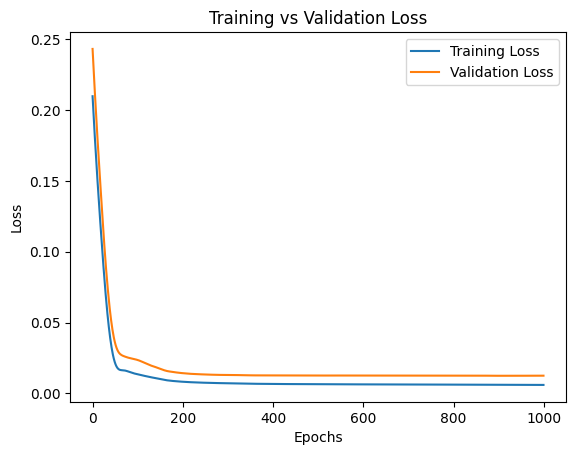

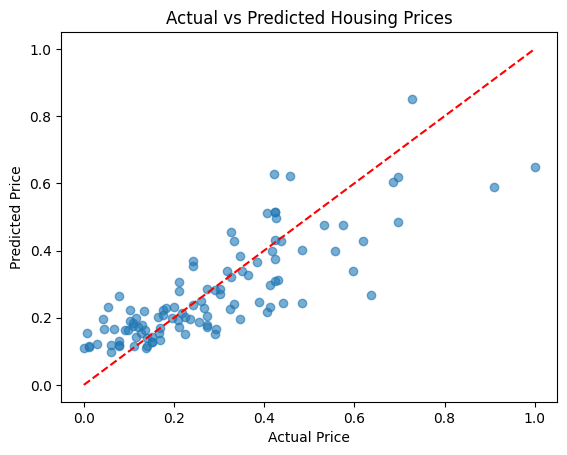

In [34]:
import numpy as np
import pandas as pd
import torch
from torch.optim import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import time

file_path = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))

binary_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[binary_features] = housing[binary_features].apply(lambda x: x.map({'yes': 1, 'no': 0}))

furnishingstatus_map = {'furnished': 1, 'semi-furnished': 0.5, 'unfurnished': 0}
housing['furnishingstatus'] = housing['furnishingstatus'].map(furnishingstatus_map)

X = housing.drop('price', axis=1)
y = housing['price']

numerical_features = [col for col in X.columns if col not in binary_features]

scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

y = scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

class FullyConnectedNN(torch.nn.Module):
    def __init__(self, input_dim):
        super(FullyConnectedNN, self).__init__()
        self.hidden1 = torch.nn.Linear(input_dim, 8)
        self.hidden2 = torch.nn.Linear(8, 16)
        self.hidden3 = torch.nn.Linear(16, 8)
        self.output = torch.nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        return self.output(x)

def train_nn_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
    input_dim = X_train.shape[1]
    model = FullyConnectedNN(input_dim)
    criterion = torch.nn.MSELoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    training_loss = []
    validation_loss = []

    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)

        if epoch % 100 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

        training_loss.append(loss.item())
        validation_loss.append(val_loss.item())

    end_time = time.time()
    training_time = end_time - start_time

    return model, training_loss, validation_loss, training_time

learning_rate = 0.001
epochs = 1000

print("Training Neural Network...")
model, train_loss, val_loss, training_time = train_nn_model(X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, learning_rate, epochs)

print(f"Total Training Time: {training_time:.2f} seconds")

with torch.no_grad():
    y_val_pred = model(X_val_tensor)
    mae = torch.mean(torch.abs(y_val_pred - y_val_tensor))
    r2 = 1 - torch.sum((y_val_pred - y_val_tensor) ** 2) / torch.sum((y_val_tensor - torch.mean(y_val_tensor)) ** 2)

print(f"Validation Accuracy - MAE: {mae.item():.4f}, R² Score: {r2.item():.4f}")

plt.plot(range(len(train_loss)), train_loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

plt.scatter(y_val_tensor.numpy(), y_val_pred.numpy(), alpha=0.6)
plt.plot(
    [y_val_tensor.min().numpy(), y_val_tensor.max().numpy()],
    [y_val_tensor.min().numpy(), y_val_tensor.max().numpy()],
    'r--'
)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.show()


Training Neural Network...
Epoch 0, Training Loss: 0.6496661305427551, Validation Loss: 0.6299961805343628
Epoch 100, Training Loss: 0.13931593298912048, Validation Loss: 0.1665811687707901
Epoch 200, Training Loss: 0.07443692535161972, Validation Loss: 0.106480173766613
Epoch 300, Training Loss: 0.053543467074632645, Validation Loss: 0.09111958742141724
Epoch 400, Training Loss: 0.043091047555208206, Validation Loss: 0.08556530624628067
Epoch 500, Training Loss: 0.0360318087041378, Validation Loss: 0.08451811224222183
Epoch 600, Training Loss: 0.030113372951745987, Validation Loss: 0.08404368907213211
Epoch 700, Training Loss: 0.02495330013334751, Validation Loss: 0.08363562077283859
Epoch 800, Training Loss: 0.020626667886972427, Validation Loss: 0.08305558562278748
Epoch 900, Training Loss: 0.017044102773070335, Validation Loss: 0.08269008249044418
Epoch 999, Training Loss: 0.014149768278002739, Validation Loss: 0.08356577157974243
Total Training Time: 1.46 seconds
Validation Accura

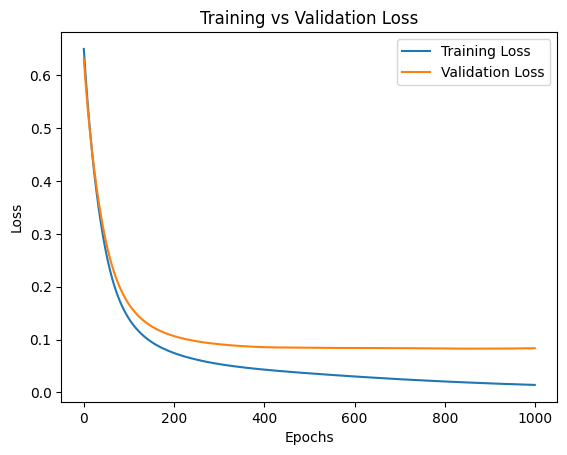

In [38]:
import numpy as np
import pandas as pd
import torch
from torch.optim import Adam
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

class CancerNN(torch.nn.Module):
    def __init__(self, input_dim):
        super(CancerNN, self).__init__()
        self.hidden = torch.nn.Linear(input_dim, 32)
        self.output = torch.nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

def train_nn_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
    input_dim = X_train.shape[1]
    model = CancerNN(input_dim)
    criterion = torch.nn.BCELoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    training_loss = []
    validation_loss = []

    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)

        if epoch % 100 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

        training_loss.append(loss.item())
        validation_loss.append(val_loss.item())

    end_time = time.time()
    training_time = end_time - start_time

    return model, training_loss, validation_loss, training_time

learning_rate = 0.001
epochs = 1000

print("Training Neural Network...")
model, train_loss, val_loss, training_time = train_nn_model(X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, learning_rate, epochs)

print(f"Total Training Time: {training_time:.2f} seconds")

with torch.no_grad():
    y_val_pred = model(X_val_tensor)
    y_val_pred_class = (y_val_pred >= 0.5).float()
    accuracy = accuracy_score(y_val_tensor.numpy(), y_val_pred_class.numpy())

print(f"Validation Accuracy: {accuracy:.4f}")

plt.plot(range(len(train_loss)), train_loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


Training Extended Neural Network...
Epoch 0, Training Loss: 0.7036060094833374, Validation Loss: 0.7015446424484253
Epoch 100, Training Loss: 0.6318418979644775, Validation Loss: 0.6358084678649902
Epoch 200, Training Loss: 0.4347566068172455, Validation Loss: 0.4548133313655853
Epoch 300, Training Loss: 0.22251078486442566, Validation Loss: 0.2602151036262512
Epoch 400, Training Loss: 0.12274513393640518, Validation Loss: 0.16361290216445923
Epoch 500, Training Loss: 0.0826440155506134, Validation Loss: 0.12245015799999237
Epoch 600, Training Loss: 0.06367771327495575, Validation Loss: 0.10244546830654144
Epoch 700, Training Loss: 0.05310984328389168, Validation Loss: 0.09214307367801666
Epoch 800, Training Loss: 0.04561903327703476, Validation Loss: 0.08734460175037384
Epoch 900, Training Loss: 0.03951580449938774, Validation Loss: 0.08654642850160599
Epoch 999, Training Loss: 0.03383554890751839, Validation Loss: 0.08758692443370819
Total Training Time (Extended Model): 3.86 seconds

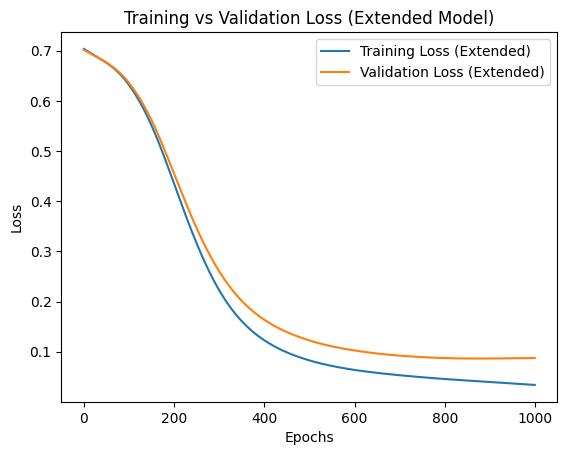

In [61]:
import numpy as np
import torch
from torch.optim import Adam
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

class ExtendedCancerNN(torch.nn.Module):
    def __init__(self, input_dim):
        super(ExtendedCancerNN, self).__init__()
        self.hidden1 = torch.nn.Linear(input_dim, 32)
        self.hidden2 = torch.nn.Linear(32, 64)
        self.hidden3 = torch.nn.Linear(64, 32)
        self.output = torch.nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        x = torch.sigmoid(self.output(x))
        return x

def train_extended_nn_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
    input_dim = X_train.shape[1]
    model = ExtendedCancerNN(input_dim)
    criterion = torch.nn.BCELoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    training_loss = []
    validation_loss = []

    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)

        if epoch % 100 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

        training_loss.append(loss.item())
        validation_loss.append(val_loss.item())

    end_time = time.time()
    training_time = end_time - start_time

    return model, training_loss, validation_loss, training_time

learning_rate = 0.0001
epochs = 1000

print("Training Extended Neural Network...")
extended_model, extended_train_loss, extended_val_loss, extended_training_time = train_extended_nn_model(
    X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, learning_rate, epochs
)

print(f"Total Training Time (Extended Model): {extended_training_time:.2f} seconds")

with torch.no_grad():
    y_val_pred = extended_model(X_val_tensor)
    y_val_pred_class = (y_val_pred >= 0.5).float()
    extended_accuracy = accuracy_score(y_val_tensor.numpy(), y_val_pred_class.numpy())

print(f"Validation Accuracy (Extended Model): {extended_accuracy:.4f}")

plt.plot(range(len(extended_train_loss)), extended_train_loss, label='Training Loss (Extended)')
plt.plot(range(len(extended_val_loss)), extended_val_loss, label='Validation Loss (Extended)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss (Extended Model)')
plt.show()


In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

input_dim = 32 * 32 * 3
hidden_dim = 256
output_dim = 10
model = SimpleNN(input_dim, hidden_dim, output_dim).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, trainloader, criterion, optimizer, epochs):
    start_time = time.time()
    for epoch in range(epochs):
        running_loss = 0.0
        model.train()
        for i, (inputs, labels) in enumerate(trainloader, 0):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader):.4f}")

    end_time = time.time()
    training_time = end_time - start_time
    print(f"Training completed in {training_time:.2f} seconds.")
    return training_time

def evaluate_model(model, testloader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Validation Accuracy: {accuracy:.4f}")
    return accuracy

epochs = 100
print("Training the network on GPU...")
training_time = train_model(model, trainloader, criterion, optimizer, epochs)

print("Evaluating the network...")
validation_accuracy = evaluate_model(model, testloader)


Using device: cuda
Files already downloaded and verified
Files already downloaded and verified
Training the network on GPU...
Epoch 1/100, Loss: 1.6437
Epoch 2/100, Loss: 1.4499
Epoch 3/100, Loss: 1.3634
Epoch 4/100, Loss: 1.2979
Epoch 5/100, Loss: 1.2431
Epoch 6/100, Loss: 1.1843
Epoch 7/100, Loss: 1.1350
Epoch 8/100, Loss: 1.0928
Epoch 9/100, Loss: 1.0462
Epoch 10/100, Loss: 1.0068
Epoch 11/100, Loss: 0.9601
Epoch 12/100, Loss: 0.9238
Epoch 13/100, Loss: 0.8746
Epoch 14/100, Loss: 0.8473
Epoch 15/100, Loss: 0.8219
Epoch 16/100, Loss: 0.7846
Epoch 17/100, Loss: 0.7592
Epoch 18/100, Loss: 0.7258
Epoch 19/100, Loss: 0.7039
Epoch 20/100, Loss: 0.6772
Epoch 21/100, Loss: 0.6601
Epoch 22/100, Loss: 0.6365
Epoch 23/100, Loss: 0.5982
Epoch 24/100, Loss: 0.6048
Epoch 25/100, Loss: 0.5640
Epoch 26/100, Loss: 0.5529
Epoch 27/100, Loss: 0.5276
Epoch 28/100, Loss: 0.5179
Epoch 29/100, Loss: 0.4983
Epoch 30/100, Loss: 0.4860
Epoch 31/100, Loss: 0.4835
Epoch 32/100, Loss: 0.4488
Epoch 33/100, Loss:

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class ExtendedNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(ExtendedNN, self).__init__()
        self.hidden1 = nn.Linear(input_dim, hidden_dim1)
        self.hidden2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.hidden3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.output = nn.Linear(hidden_dim3, output_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        x = self.output(x)
        return x

input_dim = 32 * 32 * 3
hidden_dim1 = 512
hidden_dim2 = 256
hidden_dim3 = 128
output_dim = 10
model = ExtendedNN(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, trainloader, criterion, optimizer, epochs):
    start_time = time.time()
    for epoch in range(epochs):
        running_loss = 0.0
        model.train()
        for i, (inputs, labels) in enumerate(trainloader, 0):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader):.4f}")

    end_time = time.time()
    training_time = end_time - start_time
    print(f"Training completed in {training_time:.2f} seconds.")
    return training_time

def evaluate_model(model, testloader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Validation Accuracy: {accuracy:.4f}")
    return accuracy

epochs = 100
print("Training the extended network on GPU...")
training_time = train_model(model, trainloader, criterion, optimizer, epochs)

print("Evaluating the extended network...")
validation_accuracy = evaluate_model(model, testloader)


Using device: cuda
Files already downloaded and verified
Files already downloaded and verified
Training the extended network on GPU...
Epoch 1/100, Loss: 1.6575
Epoch 2/100, Loss: 1.4365
Epoch 3/100, Loss: 1.3197
Epoch 4/100, Loss: 1.2291
Epoch 5/100, Loss: 1.1464
Epoch 6/100, Loss: 1.0720
Epoch 7/100, Loss: 1.0016
Epoch 8/100, Loss: 0.9263
Epoch 9/100, Loss: 0.8616
Epoch 10/100, Loss: 0.8051
Epoch 11/100, Loss: 0.7396
Epoch 12/100, Loss: 0.6812
Epoch 13/100, Loss: 0.6369
Epoch 14/100, Loss: 0.5955
Epoch 15/100, Loss: 0.5520
Epoch 16/100, Loss: 0.5194
Epoch 17/100, Loss: 0.4827
Epoch 18/100, Loss: 0.4477
Epoch 19/100, Loss: 0.4275
Epoch 20/100, Loss: 0.4120
Epoch 21/100, Loss: 0.3863
Epoch 22/100, Loss: 0.3590
Epoch 23/100, Loss: 0.3577
Epoch 24/100, Loss: 0.3343
Epoch 25/100, Loss: 0.3219
Epoch 26/100, Loss: 0.3148
Epoch 27/100, Loss: 0.2970
Epoch 28/100, Loss: 0.2899
Epoch 29/100, Loss: 0.2815
Epoch 30/100, Loss: 0.2656
Epoch 31/100, Loss: 0.2680
Epoch 32/100, Loss: 0.2613
Epoch 33/1